# IoT Anomaly Detection - Cluster Models

The purpose of this notebook is to create model per group of devices of the same type.

In [1]:
# imports
import sys
sys.path.append('../src')
from main import main
from ConfigConsts import *
from collections import OrderedDict

In [2]:
# Consts
CLUSTER_ARGS_FILE_PATH = "@../args/cluster/{}_Cluster.txt"
CLUSTER_DELIMETER = "_"
PROV_SECURITY_CAM = PROV_737_SECURITY_CAM + CLUSTER_DELIMETER + PROV_838_SECURITY_CAM

CLUSTER_ARGS_FILES = [
    (PROV_SECURITY_CAM,              [CLUSTER_ARGS_FILE_PATH.format(PROV_SECURITY_CAM)]),
]

Configuration:
name=Provision_737_Security_Camera_Provision_838_Security_Camera_Cluster
model=AutoEncoder
loss=MSE
optimizer=SGD
learning_rate=0.02
epochs=350
batch_size=32
iots=['Provision_737_Security_Camera', 'Provision_838_Security_Camera']
train_test_split=0.66
train_val_split=0.8
model_filename=None
train=True
test=True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 86]           9,976
           Sigmoid-2                [-1, 1, 86]               0
            Linear-3                [-1, 1, 57]           4,959
           Sigmoid-4                [-1, 1, 57]               0
            Linear-5                [-1, 1, 38]           2,204
           Sigmoid-6                [-1, 1, 38]               0
            Linear-7                [-1, 1, 23]             897
           Sigmoid-8                [-1, 1, 23]               0
            Linear-9           

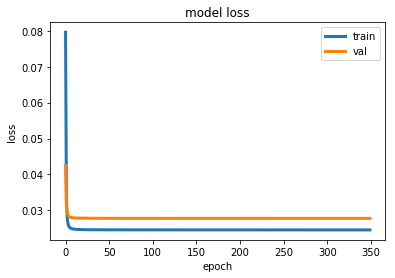

In [3]:
dfs_results = OrderedDict()
for iot, args in CLUSTER_ARGS_FILES:
    dfs_results[iot] = main(args)

In [4]:
for iot, results in dfs_results.items():
    display(results)

,Provision_737_Security_Camera,Provision_838_Security_Camera
benign_test,0.000000,0.001164
gafgyt_combo,0.998012,0.997827
gafgyt_junk,0.995793,0.995803
gafgyt_scan,0.995802,0.995528
gafgyt_tcp,0.000000,0.000000
gafgyt_udp,0.000000,0.000000
mirai_ack,0.997919,0.997827
mirai_scan,0.998760,0.998702
mirai_syn,0.998053,0.998060
mirai_udp,0.999245,0.999256
